In [1]:
import numpy as np
from PMM.PMMInverse import PMMI
from PMM.PMMInSitu import PMMInSitu
import os

conf_file = '../confs/conf_hex_exp.yaml'
PPCI = PMMInSitu(conf_file)
print(PPCI.config)


checking port /dev/tty.usbserial-AB0MNPBN
{'array-a': 0.02, 'array-x': 5, 'array-y': 5, 'mobility': 0, 'bulb-length': 0.3, 'serial_ports': {'/dev/tty.usbserial-AB0MNPBN': [101, 102, 103]}, 'env': {'name': 'ceviche', 'type': 'anaconda'}}


In [303]:
PPCI.Run_Bulb_VI(102, V, 10)

In [304]:
PPCI.Deactivate_Bulb('all')

In [302]:
V -=1
print(V)

6


In [287]:
V=11

Had an issue actually inserting the mode w/prb1:
Factor is exactly singular
Had an issue actually inserting the mode w/prb2:
Factor is exactly singular


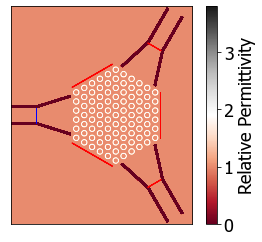

In [4]:
import numpy as np
from PMM.PMMInverse import PMMI
import os

a = 0.024
res = 50
nx = 20
ny = 24
dpml = 2
b_o = 0.0075/a
b_i = 0.0065/a
entrance = 0.04/a
output = os.getcwd()+'/../outputs'
fname = 'Hex5WvgUpUniform'
run_no = ['','']

## Set up domain geometry #####################################################
PPC = PMMI(a, res, nx, ny, dpml) #Initialize PMMI object
PPC.Add_INFOMW_Horn(np.array([6.5, 12]), np.array([1,0]), 6.5, pol ='TM')
PPC.Add_INFOMW_Horn(5*np.array([0.5, 3**0.5/2])+np.array([11.5,12]), np.array([-0.5,-3**0.5/2]), 8, pol ='TM')
PPC.Add_INFOMW_Horn(5*np.array([0.5, -3**0.5/2])+np.array([11.5,12]), np.array([-0.5,3**0.5/2]), 8, pol ='TM')
PPC.Design_Region((6.5, 6.5), (10, 11)) #Specify Region where elements are being optimized

uniform = True
PPC.Rod_Array_Hexagon_train(np.array([11.5,12]), 6, b_i/2**0.5, 1,\
                          a_basis = np.array([[0,1],[np.sqrt(3)/2,1./2]]),\
                          bulbs = True, r_bulb = (b_i, b_o), eps_bulb = 3.8) #Rod ppc array


## Set up Sources and Sim #####################################################
w = 0.33 #Source frequency
wpmax = 0.47
gamma = 0#PPC.gamma(1e9)

ew = 0.048/a/2-0.004/a
hd = 0.089/a
x = np.array([1,0])
y = np.array([0,1])
horn_dir_1 = np.array([0.5,3**0.5/2])
horn_dir_2 = np.array([0.5,-3**0.5/2])
open_dir_1 = np.array([3**0.5/2,-0.5])
open_dir_2 = np.array([3**0.5/2,0.5])
cen = np.array([11.5,12])

PPC.Add_Source(np.array([6.5-hd,12-ew]), np.array([6.5-hd,12+ew]), w, 'src', 'ez')
PPC.Add_Probe((5+hd)*horn_dir_1 + ew*open_dir_1 + cen,\
              (5+hd)*horn_dir_1 - ew*open_dir_1 + cen, w, 'prb1', 'ez')
PPC.Add_Probe((5+hd)*horn_dir_2 + ew*open_dir_2 + cen,\
              (5+hd)*horn_dir_2 - ew*open_dir_2 + cen, w, 'prb2', 'ez')
PPC.Add_Probe(-5.8*(3**0.5/2)*horn_dir_1 + 2.55*open_dir_1 + cen,\
              -5.8*(3**0.5/2)*horn_dir_1 - 2.55*open_dir_1 + cen, w, 'loss_ul', 'ez')
PPC.Add_Probe(-5.8*(3**0.5/2)*horn_dir_2 + 2.55*open_dir_2 + cen,\
              -5.8*(3**0.5/2)*horn_dir_2 - 2.55*open_dir_2 + cen, w, 'loss_ll', 'ez')
PPC.Add_Probe(5.8*(3**0.5/2)*x - 2.55*y + cen,\
              5.8*(3**0.5/2)*x + 2.55*y + cen, w, 'loss_R', 'ez')

rod_eps = 0.999*np.ones(61) #Rod perm values
# rho = -10*np.ones(61) #Rod perm values
# path4 = [11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39,40, 41,42, 43, 44, 45, 46, 47, 49, 51,\
#        59, 58, 57, 56, 55, 54, 53]
# rho[path4] = PPC.Eps_to_Rho(epsr = 0.5, plasma = True, w_src = PPC.gamma(4e9), wp_max = wpmax)
# path6 = [53, 54, 42, 40, 38, 28, 26, 24, 14, 12, 16, 6, 4, 2]
#rho[path6] = PPC.Eps_to_Rho(epsr = 0.5, plasma = True, w_src = PPC.gamma(6e9), wp_max = wpmax)
rho = PPC.Eps_to_Rho(epsr = rod_eps, plasma = True, w_src = w, wp_max = wpmax) #Initial Parameters
#rho = PPC.Read_Params(output+'/params/'+fname+run_no[0]+'.csv')
#rho = PPC.Read_Params(output+'/params/ManMadeWvgDn.csv')
#E0 = PPC.Read_Params(output+'/params/'+fname+'_norm_src.csv')
#E0l = PPC.Read_Params(output+'/params/'+fname+'_norm_prb.csv')

PPC.Viz_Domain_opt(rho, savepath = output+'/plots/'+fname+run_no[1]+'_domain.pdf',\
                   w = 0.33, src_names = ['src'], prb_names = ['prb1','prb2','loss_ul','loss_ll','loss_R'],\
                   plasma = True, wp_max = wpmax, uniform = uniform, gamma = gamma)

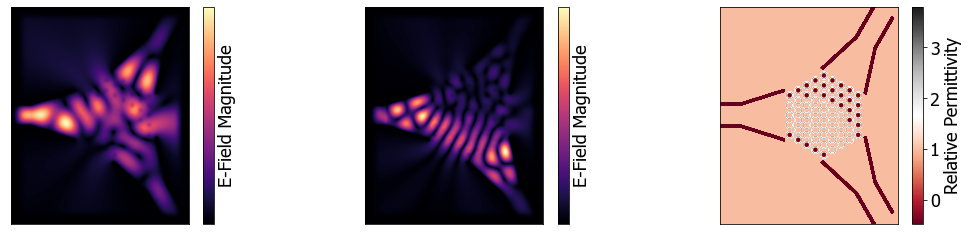

In [1]:
import numpy as np
from PMM.PMMInverse import PMMI
import os

a = 0.020
res = 50
nx = 18
ny = 22
dpml = 2
b_o = 0.0075/a
b_i = 0.0065/a
entrance = 0.04/a
output = os.getcwd()+'/../outputs'
fname = 'Hex5WvgUpUniform'
run_no = ['','']

## Set up domain geometry #####################################################
PPC = PMMI(a, res, nx, ny, dpml) #Initialize PMMI object
PPC.Add_INFOMW_Horn(np.array([6.5, 11]), np.array([1,0]), 6.5, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, 3**0.5/2])+np.array([10.5,11]), np.array([-0.5,-3**0.5/2]), 8, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, -3**0.5/2])+np.array([10.5,11]), np.array([-0.5,3**0.5/2]), 8, pol ='TM')
PPC.Design_Region((6.5, 6.5), (8, 9)) #Specify Region where elements are being optimized

uniform = True
PPC.Rod_Array_Hexagon_train(np.array([10.5,11]), 5, b_i/2**0.5, 1,\
                          a_basis = np.array([[0,1],[np.sqrt(3)/2,1./2]]),\
                          bulbs = True, r_bulb = (b_i, b_o), eps_bulb = 3.8) #Rod ppc array

rho = PPC.Read_Params(output+'/params/ManMadeWvgDn.csv')
w1 = PPC.gamma(4e9) #Source frequency
w2 = PPC.gamma(6.001e9)
wpmax = PPC.gamma(7e9)
gamma = 0#PPC.gamma(1e9)

ew = 0.048/a/2-0.004/a
hd = 0.089/a
x = np.array([1,0])
y = np.array([0,1])
horn_dir_1 = np.array([0.5,3**0.5/2])
horn_dir_2 = np.array([0.5,-3**0.5/2])
open_dir_1 = np.array([3**0.5/2,-0.5])
open_dir_2 = np.array([3**0.5/2,0.5])
cen = np.array([10.5,11])

PPC.Add_Source(np.array([6.5-hd,11-ew]), np.array([6.5-hd,11+ew]), w1, 'src_1', 'ez')
PPC.Add_Source(np.array([6.5-hd,11-ew]), np.array([6.5-hd,11+ew]), w2, 'src_2', 'ez')
PPC.Viz_Sim_abs_opt(rho,  ['src_1', 'src_2'], output+'/plots/ManMadeWvgDn4GHz_6GHz.pdf',\
                    plasma = True, wp_max = wpmax, uniform = uniform, gamma = gamma)

In [ ]:
import numpy as np
from PMM.PMMInverse import PMMI
import os

a = 0.020
res = 50
nx = 18
ny = 22
dpml = 2
b_o = 0.0075/a
b_i = 0.0065/a
entrance = 0.04/a
output = os.getcwd()+'/../outputs'
fname = 'Hex5Demult_ez_w1_5GHz_w2_7GHz_wpmax7GHz_gam0GHz_res50_coldstart_noleak'
run_no = ['_r0','_r1']

## Set up domain geometry #####################################################
PPC = PMMI(a, res, nx, ny, dpml) #Initialize PMMI object
PPC.Add_INFOMW_Horn(np.array([6.5, 11]), np.array([1,0]), 6.5, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, 3**0.5/2])+np.array([10.5,11]), np.array([-0.5,-3**0.5/2]), 8, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, -3**0.5/2])+np.array([10.5,11]), np.array([-0.5,3**0.5/2]), 8, pol ='TM')
PPC.Design_Region((6.5, 6.5), (8, 9)) #Specify Region where elements are being optimized

uniform = True
PPC.Rod_Array_Hexagon_train(np.array([10.5,11]), 5, b_i/2**0.5, 1,\
                          a_basis = np.array([[0,1],[np.sqrt(3)/2,1./2]]),\
                          bulbs = True, r_bulb = (b_i, b_o), eps_bulb = 3.8,
                          uniform = uniform) #Rod ppc array


## Set up Sources and Sim #####################################################
w1 = PPC.gamma(5e9) #Source frequency
w2 = PPC.gamma(7.001e9)
wpmax = PPC.gamma(7e9)
gamma = 0#PPC.gamma(1e9)

ew = 0.048/a/2-0.004/a
hd = 0.089/a
x = np.array([1,0])
y = np.array([0,1])
horn_dir_1 = np.array([0.5,3**0.5/2])
horn_dir_2 = np.array([0.5,-3**0.5/2])
open_dir_1 = np.array([3**0.5/2,-0.5])
open_dir_2 = np.array([3**0.5/2,0.5])
cen = np.array([10.5,11])

PPC.Add_Source(np.array([6.5-hd,11-ew]), np.array([6.5-hd,11+ew]), w1, 'src_1', 'ez')
PPC.Add_Source(np.array([6.5-hd,11-ew]), np.array([6.5-hd,11+ew]), w2, 'src_2', 'ez')
PPC.Add_Probe((4+hd)*horn_dir_1 + ew*open_dir_1 + cen,\
              (4+hd)*horn_dir_1 - ew*open_dir_1 + cen, w1, 'prb_1', 'ez')
PPC.Add_Probe((4+hd)*horn_dir_2 + ew*open_dir_2 + cen,\
              (4+hd)*horn_dir_2 - ew*open_dir_2 + cen, w2, 'prb_2', 'ez')
PPC.Add_Probe(-4.8*(3**0.5/2)*horn_dir_1 + 2.05*open_dir_1 + cen,\
              -4.8*(3**0.5/2)*horn_dir_1 - 2.05*open_dir_1 + cen, w1, 'loss_ul', 'ez')
PPC.Add_Probe(-4.8*(3**0.5/2)*horn_dir_2 + 2.05*open_dir_2 + cen,\
              -4.8*(3**0.5/2)*horn_dir_2 - 2.05*open_dir_2 + cen, w1, 'loss_ll', 'ez')
PPC.Add_Probe(4.8*(3**0.5/2)*x - 2.05*y + cen,\
              4.8*(3**0.5/2)*x + 2.05*y + cen, w1, 'loss_R', 'ez')

rod_eps = 0.999*np.ones(61) #Rod perm values
rho = PPC.Eps_to_Rho(epsr = rod_eps, plasma = True, w_src = w1, wp_max = wpmax) #Initial Parameters
#rho = PPC.Read_Params(output+'/params/'+fname+run_no[0]+'.csv')
#rho = PPC.Read_Params(output+'/params/Hex5Demult_ez_w1_4GHz_w2_6GHz_wpmax8GHz_gam0GHz_res50_uniformstart_noleak_r4.csv')
#Norms = PPC.Read_Params(output+'/params/'+fname+'_norms.csv')

rho_opt, obj, E01, E02, E01l, E02l, E0l = PPC.Optimize_Multiplexer_Penalize(rho, 0.01, 200, 'src_1', 'src_2',\
                                            'prb_1', 'prb_2', ['loss_ul', 'loss_ll', 'loss_R'], plasma = True,\
                                             wp_max = wpmax, gamma = gamma, uniform = uniform,\
                                             param_evolution = True, param_out = output+'/run_params')
#                                             param_evolution = True, param_out = output+'/run_params',\
#                                             E01 = Norms[0], E02 = Norms[1],\
#                                             E01l = Norms[2], E02l = Norms[3], E0l = Norms[4:])

## Save parameters and visualize ##############################################
PPC.Save_Params(rho_opt, output+'/params/'+fname+run_no[1]+'.csv')
PPC.Save_Params(np.array([E01, E02, E01l, E02l]+E0l.tolist()), output+'/params/'+fname+'_norms.csv') 
print(PPC.Rho_to_Eps(rho = rho_opt, plasma = True, w_src = w1, wp_max = wpmax))
PPC.Params_to_Exp(rho = rho_opt, src = 'src_1', plasma = True,  wp_max = wpmax)
PPC.Viz_Sim_abs_opt(rho_opt,  ['src_1', 'src_2'], output+'/plots/'+fname+run_no[1]+'.pdf',\
                    plasma = True, wp_max = wpmax, uniform = uniform, gamma = gamma)
PPC.Save_Params(obj, output+'/plots/'+fname+'_obj'+run_no[1]+'.csv')
PPC.Viz_Obj(obj, output+'/plots/'+fname+'_obj'+run_no[1]+'.pdf')

In [5]:
rho = PPC.Read_Params(output+'/params/ManMadeWvgDn.csv')

In [6]:
rho

array([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
         0., -10.,   0., -10.,   0., -10.,   0., -10.,   0., -10.,   0.,
       -10.,   0., -10.,   0., -10.,   0., -10.,   0., -10.,   0., -10.,
         0., -10.,   0., -10.,   0., -10.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., -10.,   0., -10.,   0., -10.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., -10.])

In [2]:
4*3**0.5

6.928203230275509